# Implémentation SVM dans Python From Scratch - Guide étape par étape

1. Importer les bibliothèques-

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2. Charger le jeu de données

In [ ]:
data = pd.read_csv("C:/Users/LENOVO/Desktop/tp1/Social_Network_Ads.csv")

3. Divisez le jeu de données en X et Y

In [ ]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

4. Divisez le jeu de données X et Y en l’ensemble d’entraînement et l’ensemble de test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Lors de la division en ensemble de formation et de test, vous devez vous rappeler que 80% à 90% de vos données doivent figurer dans les tests d’entraînement. Et c’est pourquoi j’écris test_size = 0,25.

Maintenant, nous avons divisé notre ensemble de données en X_train, X_test, y-train et y_test. L’étape suivante est-

5. Effectuer la mise à l’échelle des fonctionnalités

Comme vous pouvez le voir dans le jeu de données, toutes les valeurs ne sont pas dans la même plage. Et cela demande beaucoup de temps pour le calcul. Donc, pour surmonter ce problème, nous effectuons une mise à l’échelle des fonctionnalités.

La mise à l’échelle des fonctionnalités nous aide à normaliser les données dans une plage particulière.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

6. Adaptez la SVM à l’ensemble d’entraînement

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

Cette classe SVC nous permet de construire un modèle SVM noyau (linéaire et non linéaire), La valeur par défaut du noyau est 'rbf'. Pourquoi 'rbf', parce qu’il est non linéaire et donne de meilleurs résultats par rapport au linéaire.

Le classifier.fit(X_train, y_train) adapte l’algorithme SVM à l’ensemble d’entraînement - X_train et y_train.

Maintenant, tout est fait. Il est temps de prédire l’ensemble de tests. Donc, la prochaine étape est...

6. Prédire les résultats de l’ensemble de tests

7. Prédire les résultats de l’ensemble de tests

In [ ]:
y_pred = classifier.predict(X_test)

8. Faites la matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[64  4]
 [ 3 29]]


0.93

Et nous avons obtenu une précision de 93%.

Il est maintenant temps de présenter nos résultats sous une forme visuelle. Donc, la prochaine étape est...

9. Visualisez les résultats de l’ensemble de tests

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


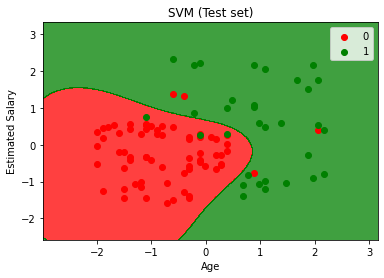

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Ainsi, après avoir exécuté ce code, vous obtiendrez vos résultats visuels-

SVM en Python
Comme vous pouvez le voir sur l'image, il y a un total de 7 prédictions incorrectes. Il y a 3 prédictions vertes (oui) qui ont été prédites comme rouges (non) et 4 prédictions rouges (non) qui ont été prédites comme vertes (oui).

Mais dans l'ensemble, nous avons obtenu une précision de 93 % et c'est formidable.

J'espère que vous avez maintenant une meilleure compréhension de la machine à vecteur de support. Il est maintenant temps de conclure.